In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Feature Extraction

In [2]:
df = pd.read_csv("D:\Python\ML\Datasets\glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
x = df.drop(columns = ['Type'])
y = df['Type']


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size  = .20,random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.fit_transform(xtest)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(sc_xtrain)
print(f'Explained Variance (Eigen Values): {pca.explained_variance_}')
print(f'Sum of Explained Variance: {np.sum(pca.explained_variance_)}')
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'PC1 Ratio: {2.59759741e+00 /9.052941176470593}')

Explained Variance (Eigen Values): [2.59759741e+00 1.92711785e+00 1.37769170e+00 1.26786135e+00
 9.41675496e-01 4.67278006e-01 3.88836152e-01 8.30736039e-02
 1.80960041e-03]
Sum of Explained Variance: 9.052941176470593
Explained Variance Ratio: [2.86934087e-01 2.12872018e-01 1.52181669e-01 1.40049662e-01
 1.04018736e-01 5.16161540e-02 4.29513618e-02 9.17642149e-03
 1.99890884e-04]
PC1 Ratio: 0.28693408687459376


# Elbow Plot for variance and dimension

In [96]:
val = pca.explained_variance_ratio_.cumsum()*100 #both are sme
# val = np.cumsum(pca.explained_variance_ratio_)* 100
val

array([ 5.74795336,  9.85964439, 13.64251154, 16.58237366, 19.13881288,
       21.36865721, 23.32120968, 25.09281499, 26.65547517, 28.08043088,
       29.44143972, 30.66398049, 31.79971682, 32.91280711, 33.96311764,
       34.9754434 , 35.92674613, 36.86126057, 37.76851945, 38.65384678,
       39.49275389, 40.30478093, 41.07994168, 41.83225354, 42.55994389,
       43.25869985, 43.94915456, 44.6140782 , 45.24475323, 45.86105452,
       46.47197663, 47.06901372, 47.64629731, 48.21997965, 48.78480156,
       49.33112329, 49.87055373, 50.39491484, 50.8997581 , 51.38828831,
       51.87053225, 52.34643315, 52.80644081, 53.2640695 , 53.71365335,
       54.16037526, 54.60421221, 55.041049  , 55.47376194, 55.90078888,
       56.32005818, 56.73223862, 57.13469922, 57.53413326, 57.92902451,
       58.31982952, 58.69972815, 59.07218191, 59.44059491, 59.80631787,
       60.15959602, 60.51068381, 60.85609736, 61.19749143, 61.53527554,
       61.87175222, 62.20346206, 62.53318729, 62.85320316, 63.16

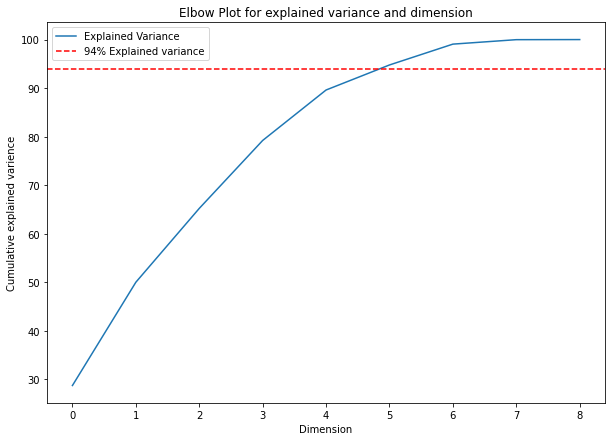

In [22]:
plt.figure(figsize = (10,7))
plt.plot(range(len(val)),val,label = 'Explained Variance')
plt.axhline(y = 94,linestyle = '--',c = 'r',label = '94% Explained variance')
plt.title('Elbow Plot for explained variance and dimension')
plt.xlabel('Dimension')
plt.ylabel('Cumulative explained varience')
plt.legend()


In [23]:
pca = PCA(n_components=0.94)
pca.fit(sc_xtrain)
pca.n_components_
# It gives us firtst 6 column or feature which match 0.94 variance ratio
# pca.n_components

6

In [ ]:
# help(PCA)

In [ ]:
# pca.n_samples_

### Digit Project

In [61]:
train = pd.read_csv("D:\\Python\\ML\\Datasets\\digit\\train.csv")

In [62]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
xtrain = train.drop(columns = 'label').values
ytrain = train['label'].values

In [64]:
test = pd.read_csv("D:\\Python\\ML\\Datasets\\digit\\test.csv")

In [65]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test = test.values
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
import cv2

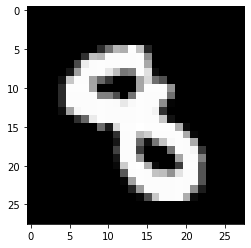

In [69]:
plt.imshow(xtrain[67].reshape(28,28),cmap = 'gray')

In [48]:
# help(plt.subplot)

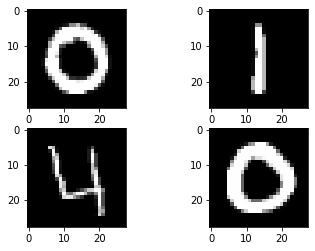

In [70]:
for i in range(1,4+1):
    plt.subplot(2,2,i)
    plt.imshow(xtrain[i].reshape(28,28),cmap = 'gray')
    

### Scalling Data

In [49]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [71]:
sc.fit(xtrain)
sc_xtrain = sc.transform(xtrain)
sc_test = sc.transform(test)

# PCA Tranformation

In [72]:
from sklearn.decomposition import PCA

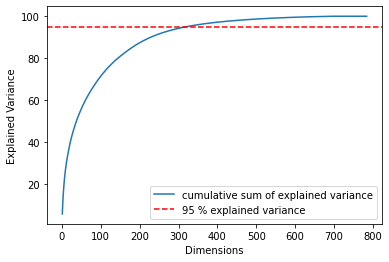

In [73]:
pca = PCA()
pca.fit(sc_xtrain)
val = np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(range(1,len(val)+1),val,label="cumulative sum of explained variance")
plt.axhline(y = 95 ,linestyle = '--',c = 'r',label="95 % explained variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.legend()

In [74]:
pca = PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain = pca.transform(sc_xtrain)
pca_test = pca.transform(sc_test)
print("Selected Components: ",pca.n_components_)

Selected Components:  320


# Visualization of Data Before And After PCA

Text(0.5, 1.0, 'Data After PCA')

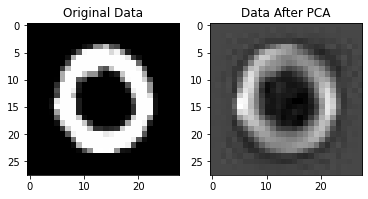

In [76]:
data_point=xtrain[1].reshape(28,28)
pca_data_point=pca.inverse_transform(pca_xtrain[1]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(data_point,cmap="gray")
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(pca_data_point,cmap="gray")
plt.title("Data After PCA")

## Classification of Handwritten Digits data using Logistic Regression

In [82]:
import datetime
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
start_time=datetime.datetime.now()
model.fit(pca_xtrain,ytrain)
end_time=datetime.datetime.now()
print("Time Taken by model to train data is : ",str(end_time-start_time))

Time Taken by model to train data is :  0:00:11.272385


C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
start_time=datetime.datetime.now()
ypred=model.predict(pca_xtrain)
end_time=datetime.datetime.now()
print("Time Taken by model to Predict the output ona test data is : ",str(end_time-start_time))

Time Taken by model to Predict the output ona test data is :  0:00:00.079953


Accuracy is  0.9383333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.93      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.95      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.94      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



<AxesSubplot:>

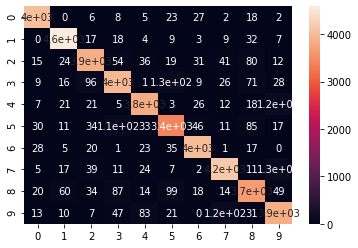

In [85]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
print("Accuracy is ",accuracy_score(ytrain,ypred))
print(classification_report(ytrain,ypred))
cm=confusion_matrix(ytrain,ypred)
sns.heatmap(cm,annot=True)  

In [90]:
output=pd.DataFrame(ypred,columns=["label"])
output.to_csv("D:\\Python\\ML\\Datasets\\digit\\test_label.csv")

In [89]:
output

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6
